# 이미지 인식 - CNN
## MNIST 사례

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') /225.0
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [6]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


In [7]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [8]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [9]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                              verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss',
                                       patience = 10)

In [10]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
                    batch_size=200, #epochs=5, verbose=2, 
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 99s 2ms/step - loss: 0.2581 - accuracy: 0.9210 - val_loss: 1.5781 - val_accuracy: 0.5070

Epoch 00001: val_loss improved from inf to 1.57812, saving model to ./model/mnist-cnn-01-1.5781.hdf5
Epoch 2/30
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0558 - val_accuracy: 0.9828

Epoch 00002: val_loss improved from 1.57812 to 0.05582, saving model to ./model/mnist-cnn-02-0.0558.hdf5
Epoch 3/30
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0370 - val_accuracy: 0.9879

Epoch 00003: val_loss improved from 0.05582 to 0.03700, saving model to ./model/mnist-cnn-03-0.0370.hdf5
Epoch 4/30
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0377 - accuracy: 0.9887 - val_loss: 0.0308 - val_accuracy: 0.9922

Epoch 00004: val_loss improved from 0.03700 to

In [11]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/mnist-cnn-07-0.0184.hdf5')

In [12]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose = 0)[1]))


 Test Accuracy: 0.9938


In [13]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

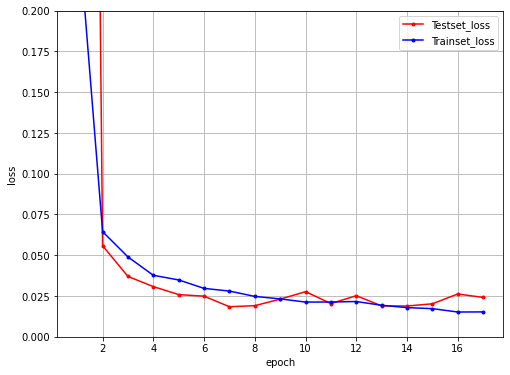

In [18]:
# 그래프로 표현
x_len = np.arange(1,len(y_vloss)+1)
plt.figure(figsize = (8,6))
plt.plot(x_len, y_vloss, marker = '.', c = "red", label ='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.ylim(0,0.2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 결론 : best model은 epoch 7, 정확도는 99.38%